In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\MeriSKILL\\drive-download-20231208T190137Z-001\\Project 2 - Diabetes Data\\Project 2 MeriSKILL\\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

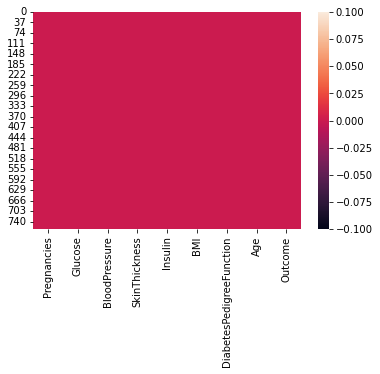

In [3]:
sns.heatmap(data.isnull())

# Exploratory Data Analysis

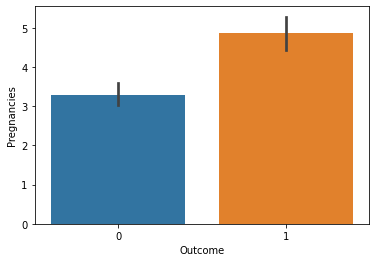

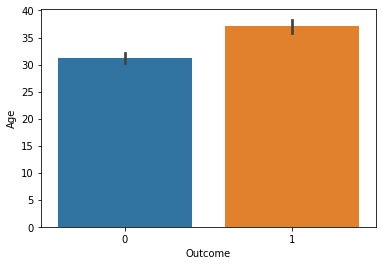

In [46]:
plt.figure()
sns.barplot(x='Outcome', y='Pregnancies',data=data)
plt.show()
sns.barplot(x='Outcome', y='Age' , data=data)
plt.show()

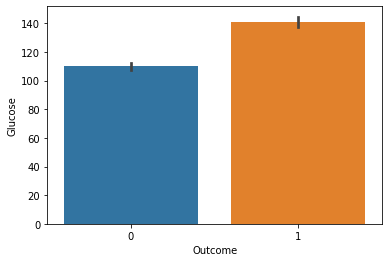

In [40]:
sns.barplot(x='Outcome' , y='Glucose' , data=data)
plt.show()

<Figure size 432x288 with 0 Axes>

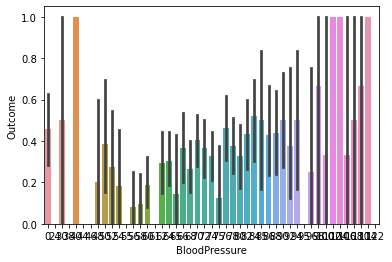

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure()
sns.barplot(y='Outcome', x='BloodPressure', data=data)
plt.figure()

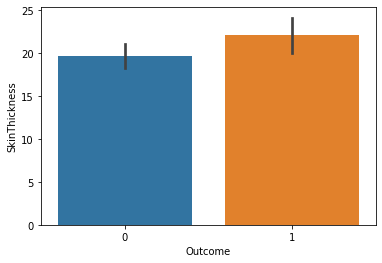

In [42]:
sns.barplot(x='Outcome', y='SkinThickness' , data=data)
plt.show()

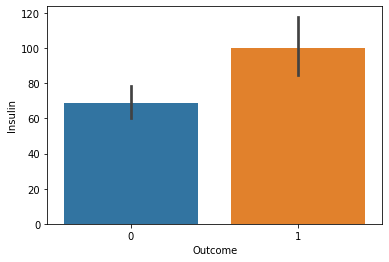

In [43]:
plt.figure()
sns.barplot(x='Outcome', y='Insulin' , data=data)
plt.show()

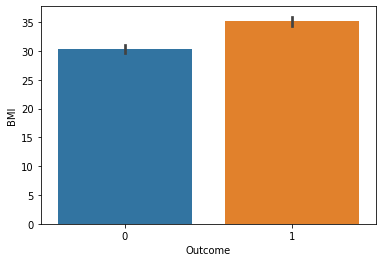

In [44]:
plt.figure()
sns.barplot(x='Outcome', y='BMI' , data=data)
plt.show()

<Figure size 432x288 with 0 Axes>

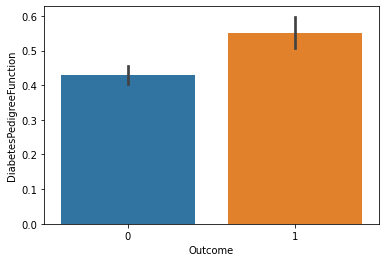

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure()
sns.barplot(x='Outcome', y='DiabetesPedigreeFunction' , data=data)
plt.figure()

In [4]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

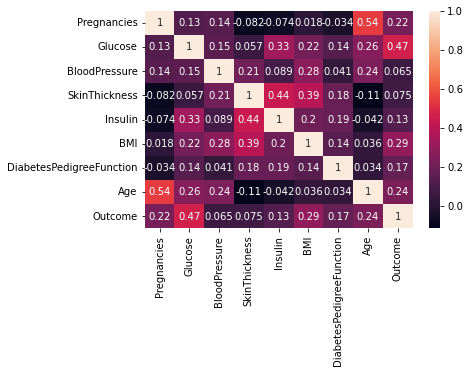

In [5]:
sns.heatmap(correlation, annot = True)

In [30]:
#Training the training split
X=data.drop('Outcome', axis=1)
Y=data['Outcome']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25)

In [31]:
#Training the model
model=LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [32]:
#Making prediction
prediction=model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 1 0 1 0 0 0]


In [33]:
accuracy=accuracy_score(prediction, Y_test)
print(accuracy)

0.7864583333333334


In [37]:
# Confusion Matrix - comparing with the actual outcome
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, prediction)
conf_matrix

array([[104,  13],
       [ 28,  47]], dtype=int64)

<AxesSubplot:>

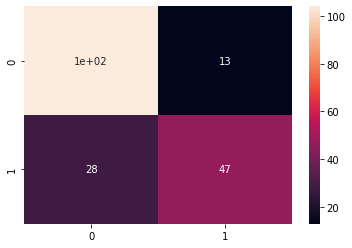

In [38]:
sns.heatmap(pd.DataFrame(conf_matrix), annot=True)